In [46]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import h5py
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers

sns.set(style='whitegrid', palette='muted', font_scale=1.5)
RANDOM_SEED = 42

In [29]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [30]:
kddCupTrain = pd.read_csv('kddCupData/kddCupTrain.csv', header=None)
kddCupTest = pd.read_csv('kddCupData/kddCupTest.csv', header=None)
kddCupTrain.shape, kddCupTest.shape

((985262, 42), (196557, 41))

In [31]:
kddCupTrain.rename(columns={41:'Class'}, inplace=True)
kddCupTrain['Class'] = np.where(kddCupTrain['Class'] == 'normal.', 0, 1)

In [32]:
print(kddCupTrain.describe(percentiles=[]))

                   0             4             5              6         7  \
count  985262.000000  9.852620e+05  9.852620e+05  985262.000000  985262.0   
mean      215.078631  1.459258e+03  3.193730e+03       0.000007       0.0   
std      1343.633640  1.097984e+05  3.401613e+04       0.002665       0.0   
min         0.000000  0.000000e+00  0.000000e+00       0.000000       0.0   
50%         0.000000  2.300000e+02  4.060000e+02       0.000000       0.0   
max     58329.000000  8.958152e+07  1.173059e+07       1.000000       0.0   

                   8              9             10             11  \
count  985262.000000  985262.000000  985262.000000  985262.000000   
mean        0.000036       0.048908       0.000097       0.710185   
std         0.015897       0.926008       0.013058       0.453677   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       1.000000   
max        14.000000      77.000000       4.00

In [33]:
kddCupTrain = pd.get_dummies(kddCupTrain, columns = kddCupTrain.columns[kddCupTrain.dtypes == 'object'])
kddCupTest = pd.get_dummies(kddCupTest, columns = kddCupTest.columns[kddCupTest.dtypes == 'object'])

X, y = kddCupTrain.drop('Class', axis=1), kddCupTrain['Class']

In [34]:
X.columns, kddCupTest.columns

(Index([             0,              4,              5,              6,
                     7,              8,              9,             10,
                    11,             12,             13,             14,
                    15,             16,             17,             18,
                    19,             20,             21,             22,
                    23,             24,             25,             26,
                    27,             28,             29,             30,
                    31,             32,             33,             34,
                    35,             36,             37,             38,
                    39,             40,       '1_icmp',        '1_tcp',
               '1_udp',        '2_IRC',        '2_X11',       '2_auth',
               '2_ctf',     '2_domain',   '2_domain_u',      '2_eco_i',
             '2_ecr_i',     '2_finger',        '2_ftp',   '2_ftp_data',
            '2_gopher',       '2_http',      '2_imap4',       '2

In [35]:
featuresList = X.columns
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[-0.16007246, -0.01133221,  1.231248  , ..., -0.00683303,
         0.24648733, -0.00142475],
       [-0.16007246, -0.01181491,  0.03922464, ..., -0.00683303,
         0.24648733, -0.00142475],
       [-0.16007246, -0.01114095, -0.05778821, ..., -0.00683303,
         0.24648733, -0.00142475],
       ...,
       [-0.16007246, -0.01130488,  0.01223743, ..., -0.00683303,
         0.24648733, -0.00142475],
       [-0.16007246, -0.01129577, -0.05761182, ..., -0.00683303,
         0.24648733, -0.00142475],
       [-0.16007246, -0.01129577, -0.06160993, ..., -0.00683303,
         0.24648733, -0.00142475]])

In [36]:
missing_cols = set(featuresList) - set(kddCupTest.columns)
print('missing_cols: ',missing_cols)
for c in missing_cols:
    kddCupTest[c] = 0
kddCupTest = kddCupTest[featuresList].copy()

kddCupTest[featuresList] = scaler.transform(kddCupTest[featuresList])

missing_cols:  {'2_tftp_u', '3_SH'}


c:\users\alex\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                               stratify=y, 
                                               random_state=RANDOM_SEED)

X_trainNorm = X_train[y_train == 0]
X_testNorm = X_test[y_test == 0]

In [51]:
pca = PCA(n_components=input_dim).fit(X_trainNorm).explained_variance_ratio_

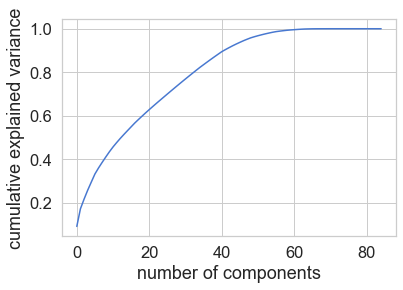

In [53]:
plt.plot(np.cumsum(pca))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [54]:
input_dim = X_trainNorm.shape[1]
layer1_dim = 60
encoder_dim = 40

In [59]:
input_layer = Input(shape=(input_dim, ))

encoder1 = Dense(layer1_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder2 = Dense(encoder_dim, activation="relu")(encoder1)
decoder1 = Dense(layer1_dim, activation='tanh')(encoder2)
decoder2 = Dense(input_dim, activation='linear')(decoder1)

In [60]:
autoencoder = Model(inputs=input_layer, outputs=decoder2)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 85)]              0         
                                                                 
 dense_4 (Dense)             (None, 60)                5160      
                                                                 
 dense_5 (Dense)             (None, 40)                2440      
                                                                 
 dense_6 (Dense)             (None, 60)                2460      
                                                                 
 dense_7 (Dense)             (None, 85)                5185      
                                                                 
Total params: 15,245
Trainable params: 15,245
Non-trainable params: 0
_________________________________________________________________


In [61]:
nb_epoch = 100
batch_size = 64

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error')

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0)
history = autoencoder.fit(X_trainNorm, X_trainNorm,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_testNorm, X_testNorm),
                    verbose=1,
                    callbacks=[checkpointer, earlystopping]).history

Epoch 1/100
12160/12160 [==============================] - 15s 1ms/step - loss: 0.3072 - val_loss: 0.2604
Epoch 2/100
12160/12160 [==============================] - 14s 1ms/step - loss: 0.2266 - val_loss: 0.2319
Epoch 3/100
12160/12160 [==============================] - 20s 2ms/step - loss: 0.2048 - val_loss: 0.2154
Epoch 4/100
12160/12160 [==============================] - 16s 1ms/step - loss: 0.1936 - val_loss: 0.2092
Epoch 5/100
12160/12160 [==============================] - 15s 1ms/step - loss: 0.1858 - val_loss: 0.2029
Epoch 6/100
12160/12160 [==============================] - 17s 1ms/step - loss: 0.1808 - val_loss: 0.1991
Epoch 7/100
12160/12160 [==============================] - 17s 1ms/step - loss: 0.1769 - val_loss: 0.1972
Epoch 8/100
12160/12160 [==============================] - 17s 1ms/step - loss: 0.1740 - val_loss: 0.1962
Epoch 9/100
12160/12160 [==============================] - 18s 1ms/step - loss: 0.1721 - val_loss: 0.2001
Epoch 10/100
12160/12160 [====================

In [62]:
autoencoder = load_model('model.h5')

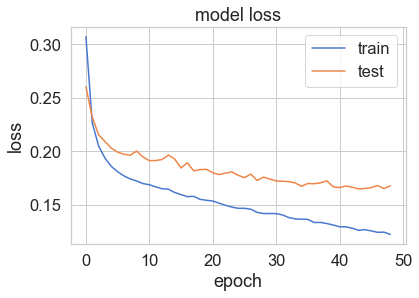

In [63]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [64]:
testPredictions = autoencoder.predict(X_test)
X_test.shape,testPredictions.shape

((197053, 85), (197053, 85))

In [65]:
testMSE = mean_squared_error(X_test.transpose(), testPredictions.transpose(),
                              multioutput='raw_values')
error_df = pd.DataFrame({'reconstruction_error': testMSE,'true_class': y_test})
error_df.head()

,reconstruction_error,true_class
940543,0.023046,1
356110,0.003431,0
540178,0.000496,0
672514,0.001498,0
244980,0.000458,0


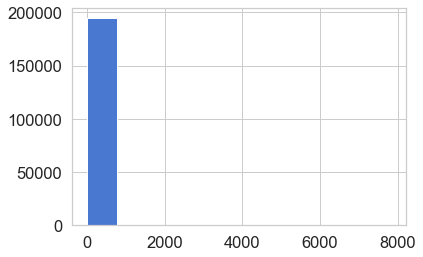

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0)]
# normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
ax.hist(normal_error_df.reconstruction_error.values, bins=10);

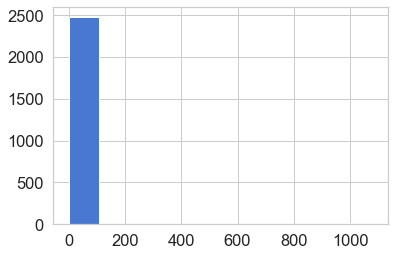

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
ax.hist(fraud_error_df.reconstruction_error.values, bins=10);

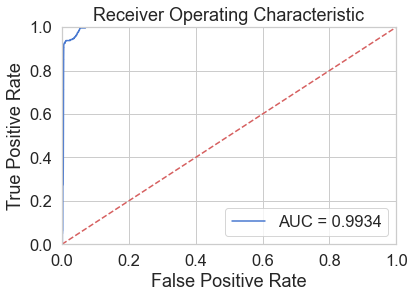

In [68]:
from sklearn.metrics import (confusion_matrix, auc, roc_curve, cohen_kappa_score, accuracy_score)

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [69]:
threshold = normal_error_df.reconstruction_error.quantile(q=0.995)
threshold

0.27432233990321503

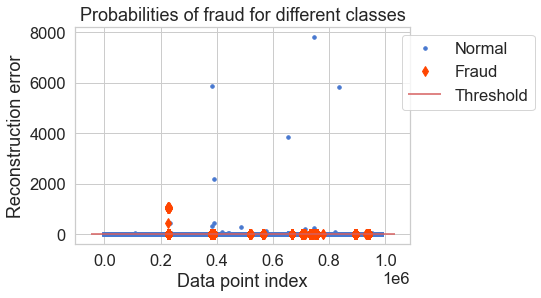

In [70]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
for name, group in groups:
    if name == 1:
        MarkerSize = 7
        Color = 'orangered'
        Label = 'Fraud'
        Marker = 'd'
    else:
        MarkerSize = 3.5
        Color = 'b'
        Label = 'Normal'
        Marker = 'o'
    ax.plot(group.index, group.reconstruction_error, 
            linestyle='',
            color=Color,
            label=Label,
            ms=MarkerSize,
            marker=Marker)
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend(loc='upper left', bbox_to_anchor=(0.95, 1))
plt.title("Probabilities of fraud for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

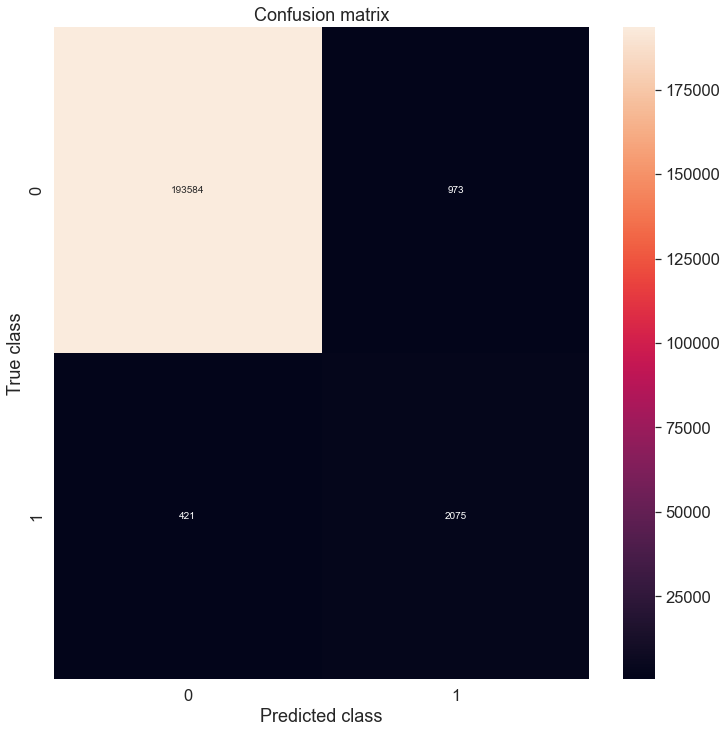

In [71]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [74]:
subPredictions = autoencoder.predict(kddCupTest)
subMSE = mean_squared_error(kddCupTest.transpose(), subPredictions.transpose(),
                            multioutput='raw_values')
result_df = pd.DataFrame({'reconstruction_error': subMSE})
result_df

,reconstruction_error
0,0.001085
1,0.001292
2,0.001297
3,0.000912
4,0.004405
...,...
196552,0.002909
196553,0.003007
196554,0.000867
196555,0.001289


In [75]:
result_df.to_csv('filename.csv')